In [1]:
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import models, layers

In [2]:
BATCH_SIZE = 64
IMAGE_SIZE = 128
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "archive/train",
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE 
)
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "archive/test",
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE  
)

Found 15557 files belonging to 23 classes.
Found 4002 files belonging to 23 classes.


In [3]:
class_names = train_dataset.class_names  
for class_index, class_name in enumerate(class_names):
    print(f"{class_index} : {class_name}")

0 : Acne and Rosacea Photos
1 : Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions
2 : Atopic Dermatitis Photos
3 : Bullous Disease Photos
4 : Cellulitis Impetigo and other Bacterial Infections
5 : Eczema Photos
6 : Exanthems and Drug Eruptions
7 : Hair Loss Photos Alopecia and other Hair Diseases
8 : Herpes HPV and other STDs Photos
9 : Light Diseases and Disorders of Pigmentation
10 : Lupus and other Connective Tissue diseases
11 : Melanoma Skin Cancer Nevi and Moles
12 : Nail Fungus and other Nail Disease
13 : Poison Ivy Photos and other Contact Dermatitis
14 : Psoriasis pictures Lichen Planus and related diseases
15 : Scabies Lyme Disease and other Infestations and Bites
16 : Seborrheic Keratoses and other Benign Tumors
17 : Systemic Disease
18 : Tinea Ringworm Candidiasis and other Fungal Infections
19 : Urticaria Hives
20 : Vascular Tumors
21 : Vasculitis Photos
22 : Warts Molluscum and other Viral Infections


2025-02-20 20:18:05.323861: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


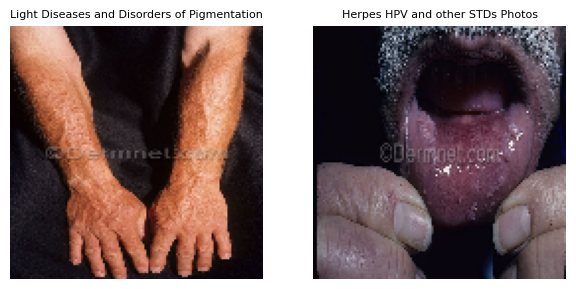

In [4]:
plt.figure(figsize=(15, 15))
for image_batch, label_batch in train_dataset.take(1):
    for i in range(2):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i].numpy()], fontsize=8)
        plt.axis("off")
plt.show()

In [5]:
def get_dataset_partitions_tf(ds, train_split = 0.8,val_split = 0.2,shuffle = True,shuffle_size = 10000):
  assert(train_split+val_split) == 1
  ds_size = len(ds)
  if shuffle:
    ds = ds.shuffle(shuffle_size, seed = 12)
  train_size = int(train_split*ds_size)
  val_size = int(val_split * ds_size)

  train_ds = ds.take(train_size)
  val_ds = ds.skip(train_size).take(val_size)
  return train_ds, val_ds

In [6]:
train_ds, val_ds = get_dataset_partitions_tf(train_dataset)

In [7]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [8]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE), 
    layers.Rescaling(1.0 / 255) 
])

In [9]:
model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)),  # First layer
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(23, activation='softmax')
])
model.build(input_shape=(BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, 3))

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.compile(
    optimizer='adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [11]:
EPOCHS = 30
history = model.fit(
    train_ds,
    epochs = EPOCHS,
    batch_size = BATCH_SIZE,
    validation_data = val_ds,
    verbose = 1,
)

Epoch 1/30
195/195 ━━━━━━━━━━━━━━━━━━━━ 129s 631ms/step - accuracy: 0.0809 - loss: 3.0145 - val_accuracy: 0.1474 - val_loss: 2.8766
Epoch 2/30
195/195 ━━━━━━━━━━━━━━━━━━━━ 130s 669ms/step - accuracy: 0.1482 - loss: 2.8697 - val_accuracy: 0.1751 - val_loss: 2.7947
Epoch 3/30
195/195 ━━━━━━━━━━━━━━━━━━━━ 131s 674ms/step - accuracy: 0.1694 - loss: 2.8015 - val_accuracy: 0.1875 - val_loss: 2.7495
Epoch 4/30
195/195 ━━━━━━━━━━━━━━━━━━━━ 154s 792ms/step - accuracy: 0.1896 - loss: 2.7276 - val_accuracy: 0.1888 - val_loss: 2.6726
Epoch 5/30
195/195 ━━━━━━━━━━━━━━━━━━━━ 130s 667ms/step - accuracy: 0.2227 - loss: 2.6157 - val_accuracy: 0.2435 - val_loss: 2.5574
Epoch 6/30
195/195 ━━━━━━━━━━━━━━━━━━━━ 133s 683ms/step - accuracy: 0.2465 - loss: 2.5324 - val_accuracy: 0.2542 - val_loss: 2.4868
Epoch 7/30
195/195 ━━━━━━━━━━━━━━━━━━━━ 134s 685ms/step - accuracy: 0.2551 - loss: 2.4739 - val_accuracy: 0.2747 - val_loss: 2.3987
Epoch 8/30
195/195 ━━━━━━━━━━━━━━━━━━━━ 133s 682ms/step - accuracy: 0.2859 -

In [12]:
model.save("my_model.keras")

In [13]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

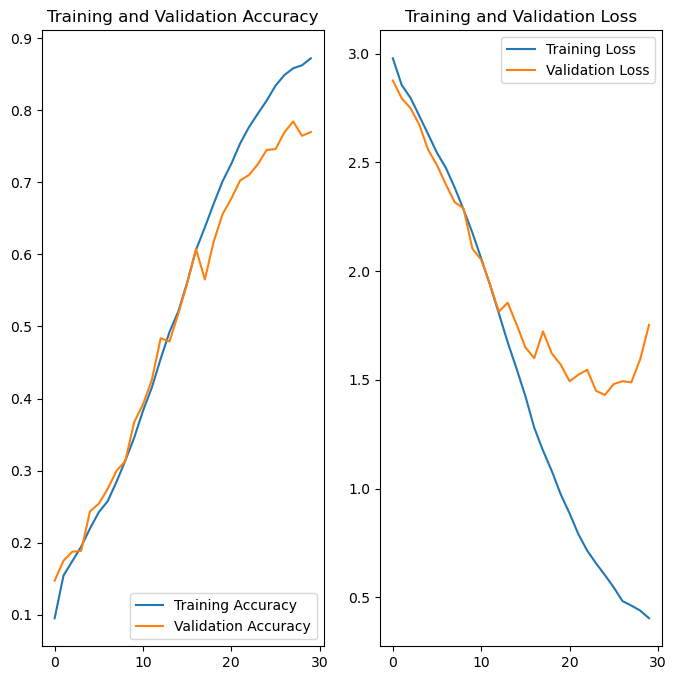

In [14]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [15]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Predicted class: Vascular Tumors, Type: <class 'str'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Predicted class: Cellulitis Impetigo and other Bacterial Infections, Type: <class 'str'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Predicted class: Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions, Type: <class 'str'>


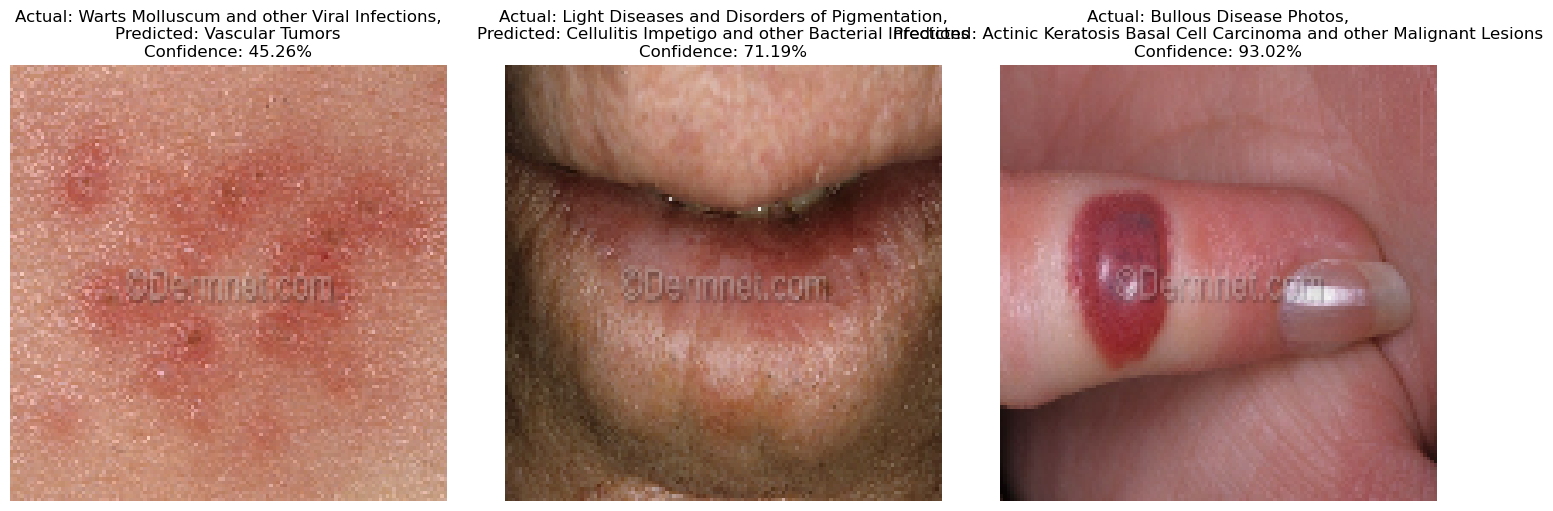

In [18]:
plt.figure(figsize=(15, 5))
for images, labels in test_ds.take(1):
    for i in range(3):  # Plot 3 images (you can increase this if needed)
        ax = plt.subplot(1, 3, i + 1)  # 1 row, 3 columns
        plt.imshow(images[i].numpy().astype("uint8"))  # Display the image
        
        # Predict the class and confidence
        predicted_class, confidence = predict(model, images[i].numpy())

        # Debugging: Print the type of predicted_class
        print(f"Predicted class: {predicted_class}, Type: {type(predicted_class)}")

        # Ensure predicted_class is an integer index
        if isinstance(predicted_class, str):
            predicted_class = class_names.index(predicted_class)  # Convert class name to index

        # Get actual class label (use the integer index for the label)
        actual_class = class_names[labels[i].numpy()]  # labels[i] should be an integer
        
        # Title showing actual and predicted class with confidence
        plt.title(f"Actual: {actual_class},\nPredicted: {class_names[predicted_class]}\nConfidence: {confidence:.2f}%")
        
        plt.axis("off")  # Hide axes

plt.tight_layout()  # To avoid overlapping
plt.show()